# Importing the libraries

In [1]:

import pandas as pd         
import numpy as np      
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler    # feature scaling
from sklearn.linear_model import SGDRegressor       # linear regression (Stochastic Gradient Descent)

In [2]:
df = pd.read_csv('data/Real estate.csv')  # importing csv file

In [4]:
df.head() # viewing first five rows

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
df.drop(columns=['No'], inplace=True)  # drop the first column which is not really useful for me 

In [30]:
df.rename(columns={'X1 transaction date':'transaction_data', 
                   'X2 house age':'house_age', 
                   'X3 distance to the nearest MRT station':'dis_mrt_sta', 
                   'X4 number of convenience stores':'n_stores', 
                   'X5 latitude':'lat', 
                   'X6 longitude':'lng', 
                   'Y house price of unit area':'price_area'}, 
          inplace=True) # Renaming the columns 

In [31]:
df.head()


,transaction_data,house_age,dis_mrt_sta,n_stores,lat,lng,price_area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [10]:
df.info() # inspecting the data frame whether it has null or not and data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transaction_data  414 non-null    float64
 1   house_age         414 non-null    float64
 2   dis_mrt_sta       414 non-null    float64
 3   n_stores          414 non-null    int64  
 4   lat               414 non-null    float64
 5   lng               414 non-null    float64
 6   price_area        414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


# Loading the data set 

In [32]:
x_train = np.array(df[['house_age', 'dis_mrt_sta', 'n_stores']]) # subsecting the dataframe whchi I am interested in learning 

In [33]:
x_train

array([[ 32.     ,  84.87882,  10.     ],
       [ 19.5    , 306.5947 ,   9.     ],
       [ 13.3    , 561.9845 ,   5.     ],
       ...,
       [ 18.8    , 390.9696 ,   7.     ],
       [  8.1    , 104.8101 ,   5.     ],
       [  6.5    ,  90.45606,   9.     ]])

In [15]:
y_train = np.array(df['price_area'])  # target

In [17]:
X_feature = ['house age', 'distance from MRT station', 'Number of stores']

# Scale/normalize the training data

In [19]:
scaler = StandardScaler()
x_norm = scaler.fit_transform(x_train)
print(f"Peak to Peak range by column in Raw         x: {np.ptp(x_train, axis=0)}")
print(f"Peak to Peak range by column in Normalize         x: {np.ptp(x_norm, axis=0)}")

Peak to Peak range by column in Raw         x: [  43.8     6464.63816   10.     ]
Peak to Peak range by column in Normalize         x: [3.84929156 5.12828671 3.39904571]


# Create and fid the regression model

In [20]:
sgdr = SGDRegressor(max_iter=1000)
sgdr.fit(x_norm, y_train)
print(sgdr)
print(f"number of iterations complete: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor()
number of iterations complete: 27, number of weight updates: 11179.0


# View Parameter 

In [21]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters:                  w: {w_norm}, b:{b_norm}")


model parameters:                  w: [-2.87740958 -6.76632216  3.84025522], b:[37.9817491]


# Make predictions 

In [23]:
y_pred_sgd = sgdr.predict(X_norm)
y_pred = np.dot(X_norm, w_norm) + b_norm
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgd).all()}")
print(f"Prediction on training set: \n {y_pred[:4]}")
print(f"Target values \n {y_train[:4]}")

prediction using np.dot() and sgdr.predict match: True
Prediction on training set: 
 [47.4400257  48.10557719 43.08129776 43.08129776]
Target values 
 [37.9 42.2 47.3 54.8]


# Plot Results 

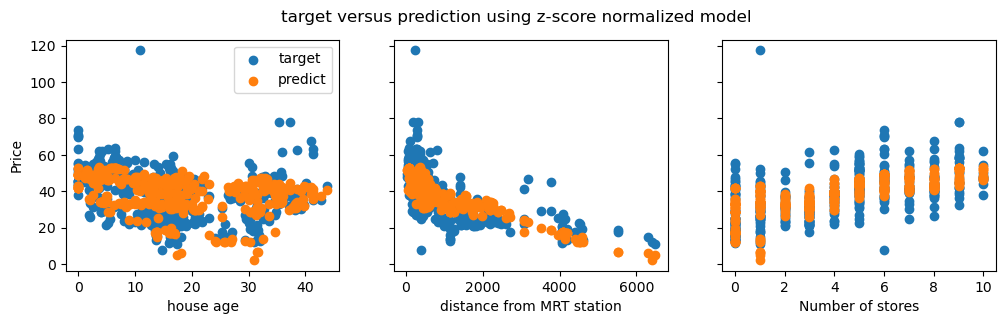

In [29]:
# plot predictions and targets vs original features  
 
fig,ax=plt.subplots(1,3,figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(X_feature[i])
    ax[i].scatter(x_train[:,i],y_pred, label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()